<a href="https://colab.research.google.com/github/bilalakhtar/Security-Awareness-Training-Analysis-Using-NLP/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Project Idea:
The project will focus on analyzing participant feedback from security awareness training programs using Natural Language Processing (NLP). The goal is to identify common areas where participants demonstrate misunderstandings or lack of clarity regarding security practices. This analysis will help to improve future training content and ensure that critical security concepts are effectively communicated.

2. Objectives:
Apply NLP techniques to process and analyze textual feedback from participants.
Detect common themes, trends, and areas of misunderstanding in the feedback.
Use sentiment analysis and keyword extraction to identify patterns of confusion or misconceptions.
Provide actionable insights to improve the content of future security awareness training programs.

3. Data Sources:
The data will be gathered from post-training surveys, feedback forms, and review comments provided by participants after completing security awareness training. The data might be sourced from:

- Internal feedback forms or surveys from the company conducting the training.
- External online sources like public reviews or testimonials from training programs.
- Synthetic datasets, if real data is unavailable, for testing and model development.

4. Methodology:
Data Collection: Gather text data from participant feedback.
Data Preprocessing: Clean the text data (removing stop words, punctuation, etc.) and prepare it for analysis.
Topic Modeling: Use techniques like Latent Dirichlet Allocation (LDA) to discover common themes or topics in the feedback.
Sentiment Analysis: Analyze the sentiment of the feedback to identify negative reviews or areas where participants express confusion.
Misconception Detection: Extract keywords or phrases indicating misunderstandings, such as misinterpretations of phishing, password policies, or data protection rules.
Evaluation and Insights: Summarize the findings to highlight the most frequent areas of misunderstanding, and provide recommendations for improving future training programs.
Tools: Python, NLTK, SpaCy, Gensim, Scikit-learn, and possibly Jupyter notebooks or Google Colab for development and visualization.

#1. Required Libraries:

In [ ]:
!pip install pandas nltk spacy gensim scikit-learn matplotlib seaborn wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the Required Libraries:

import pandas as pd
import numpy as np
import nltk
import spacy
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 2. Load and Explore the Data:

In [ ]:
# Load the dataset (replace with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reviews.csv')

# Display the first few rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


#3. Data Preprocessing:

In [ ]:
# Display the first few rows
df["Text"].head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
# Check for missing values
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [ ]:
df.nunique()

,0
Id,568454
ProductId,74258
UserId,256059
ProfileName,218415
HelpfulnessNumerator,231
HelpfulnessDenominator,234
Score,5
Time,3168
Summary,295742
Text,393579


In [ ]:
df.iloc[df.isnull().sum(1).sort_values(ascending=False).index].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
491728,491729,B004772PJQ,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...
357814,357815,B001GCTTRQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
486640,486641,B0014AUJII,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


In [ ]:
df['Text'].duplicated().sum()

174875

In [ ]:
df = df.drop_duplicates(subset='Text')

In [ ]:
df['Text'].duplicated().sum()

0

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
# Assuming the feedback column is named 'Text', inspect the feedback
df['Text'].head(20)

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
5,I got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...
8,Right now I'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...


# 4. Data Cleaning:

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'\w*\d\w*', '', text) # Remove numbers
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text) # Remove punctuation
    text = re.sub(r'\n', '', text) # Remove newline characters
    return text

# Apply the clean_text function
df['cleaned_review'] = df['Text'].apply(clean_text)

In [ ]:
df[['Text', 'cleaned_review']].head(20)

,Text,cleaned_review
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...
5,I got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...,this saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...,this taffy is so good it is very soft and che...
8,Right now I'm mostly just sprouting this so my...,right now im mostly just sprouting this so my ...
9,This is a very healthy dog food. Good for thei...,this is a very healthy dog food good for their...


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 5. Sentiment Analysis:

In [ ]:
!pip install textblob

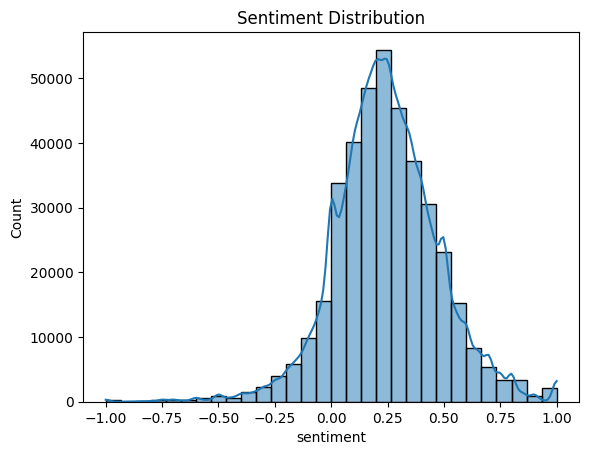

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity (-1 to 1 scale)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Plot sentiment distribution
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()

#6. Topic Modeling with LDA (Latent Dirichlet Allocation):

Tokenization and Creating a Document-Term Matrix:

In [ ]:
# Tokenize the cleaned reviews
df['tokens'] = df['cleaned_review'].apply(lambda x: x.split())

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokens'])

# Convert to Document-Term Matrix
doc_term_matrix = [dictionary.doc2bow(review) for review in df['tokens']]

Train the LDA Model:

In [ ]:
# Build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)

# Print the top 5 topics
for i, topic in lda_model.show_topics(formatted=True, num_topics=5, num_words=10):
    print(f"Topic {i+1}: {topic}")

Topic 1: 0.038*"coffee" + 0.019*"price" + 0.017*"amazon" + 0.015*"great" + 0.014*"find" + 0.012*"good" + 0.011*"store" + 0.011*"love" + 0.010*"buy" + 0.010*"best"
Topic 2: 0.029*"tea" + 0.019*"like" + 0.018*"br" + 0.016*"taste" + 0.016*"flavor" + 0.010*"water" + 0.010*"sugar" + 0.009*"good" + 0.009*"drink" + 0.007*"one"
Topic 3: 0.018*"food" + 0.010*"dog" + 0.009*"br" + 0.008*"one" + 0.007*"like" + 0.006*"dogs" + 0.006*"product" + 0.006*"eat" + 0.006*"get" + 0.006*"hair"
Topic 4: 0.017*"br" + 0.013*"product" + 0.010*"would" + 0.009*"one" + 0.009*"box" + 0.006*"bag" + 0.006*"order" + 0.006*"good" + 0.006*"time" + 0.006*"like"
Topic 5: 0.014*"like" + 0.012*"br" + 0.012*"good" + 0.011*"taste" + 0.010*"great" + 0.007*"love" + 0.007*"flavor" + 0.007*"eat" + 0.007*"sauce" + 0.006*"use"


In [26]:
#Option 1

import pickle

# Save your LDA model
with open('/content/drive/MyDrive/Colab Notebooks/lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

# Save any other preprocessing components or dictionaries if needed
dictionary.save_as_text('/content/drive/MyDrive/Colab Notebooks/dictionary.txt')

In [ ]:
#Option 2

#save the LDA model
lda_model.save("/content/drive/MyDrive/Colab Notebooks/lda_model.model")

In [ ]:
#Option 3

#save the LDA model
lda_model.save("/content/drive/MyDrive/Colab Notebooks/lda_model.pkl")

# 7. Visualization of Topics with WordCloud:

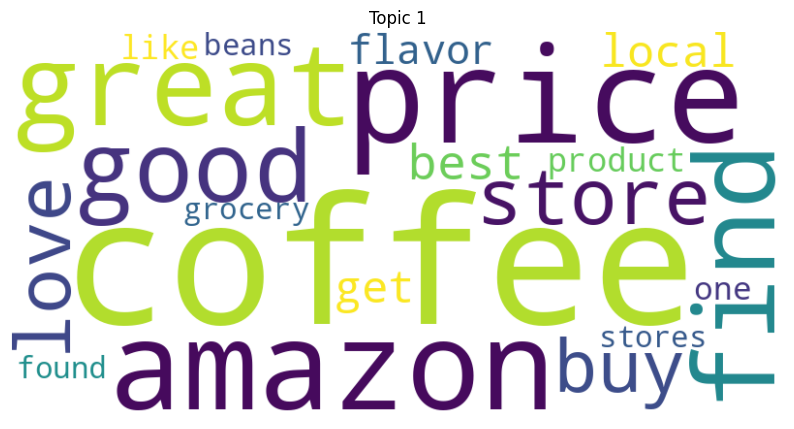

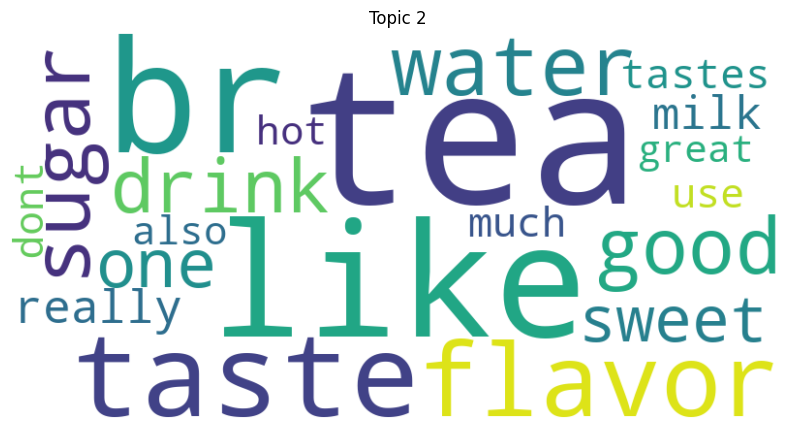

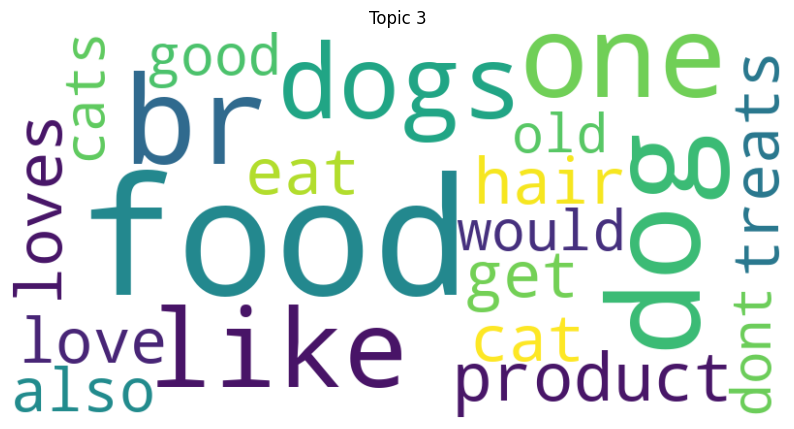

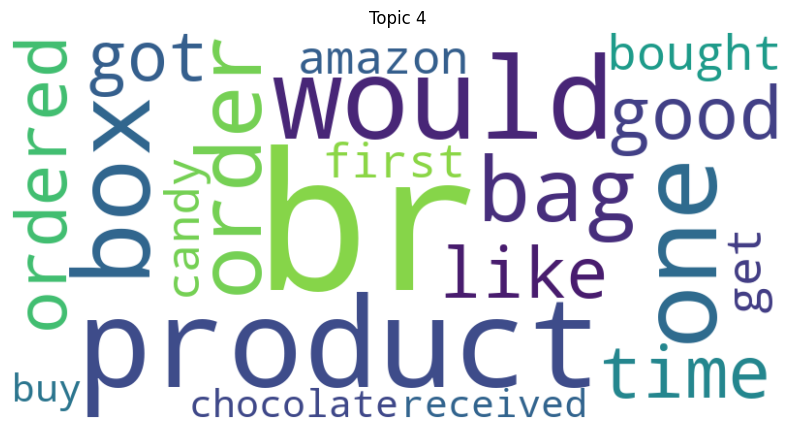

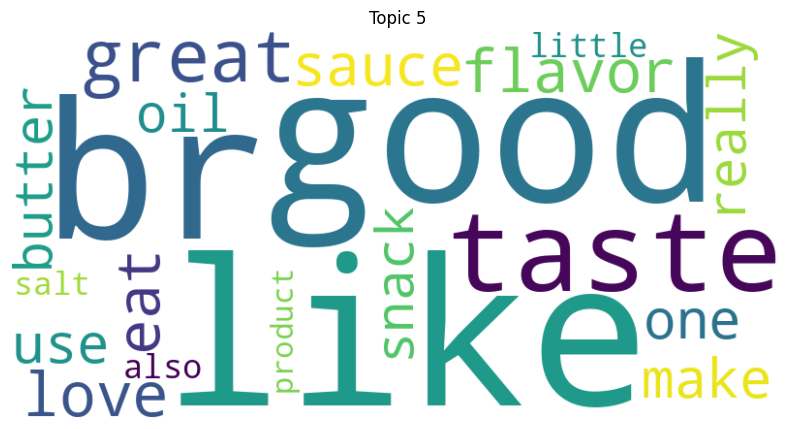

In [24]:
# Create a WordCloud for each topic
for i in range(5):
    plt.figure(figsize=(10, 6))
    wc = WordCloud(background_color='white', width=800, height=400, max_words=100).generate_from_frequencies(dict(lda_model.show_topic(i, 20)))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i+1}')
    plt.show()

# 8. Key Insights Extraction:
Identify Common Misunderstandings:
Based on sentiment and topic analysis, extract feedback where sentiment is negative, and keywords related to confusion or misunderstanding (e.g., terms related to phishing, passwords, or encryption).

In [25]:
# Filter reviews with negative sentiment (polarity < 0)
negative_reviews = df[df['sentiment'] < 0]

# Explore common topics in negative reviews
negative_reviews['cleaned_review'].apply(lambda x: lda_model[dictionary.doc2bow(x.split())])

,cleaned_review
14,"[(0, 0.02036969), (1, 0.17246936), (2, 0.02088..."
37,"[(0, 0.2521345), (4, 0.7260006)]"
52,"[(0, 0.073911555), (1, 0.18907003), (2, 0.2559..."
62,"[(0, 0.028735304), (1, 0.028679738), (2, 0.206..."
67,"[(1, 0.9276493), (3, 0.059232064)]"
...,...
568426,"[(0, 0.14829622), (1, 0.09601631), (3, 0.73711..."
568430,"[(0, 0.19452217), (1, 0.16132776), (2, 0.01198..."
568445,"[(1, 0.43000028), (4, 0.5495532)]"
568450,"[(0, 0.33682287), (1, 0.2616792), (3, 0.305043..."


# 9. Reporting the Results:
- Summary of Sentiment: Provide overall sentiment trends and highlight areas with the most negative feedback.
- Topic Trends: Summarize the topics identified through LDA, focusing on areas where confusion or misunderstanding is prevalent.